# Program to find average path length

In [1]:
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
n = int(input("no of nodes"))
print(" no of row")
matrix = []
for i in range(n):
    row = list(map(int, input().split()))
    matrix.append(row)
matrix=np.array(matrix)

no of nodes5
 no of row
0 1 1 0 0
1 0 0 1 0
0 1 1 0 1
0 1 1 0 1
0 0 0 1 0


In [4]:
def dijkstra(graph, start):
    n = len(graph)
    visited = [False] * n
    dist = [float('inf')] * n  # Set initial distances to infinity for all nodes
    dist[start] = 0  # Distance from start node to itself is 0

    # Main loop to find shortest paths
    for _ in range(n):
        min_dist = float('inf')
        min_index = -1

        # Find the node with the minimum distance among the nodes that have not been visited yet
        for i in range(n):
            if not visited[i] and dist[i] < min_dist:
                min_dist = dist[i]
                min_index = i

        u = min_index  # Update the current node with the minimum distance
        visited[u] = True  # Mark the node as visited

        # Update distances for neighboring nodes
        for v in range(n):
            if not visited[v] and graph[u][v] != 0 and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]

    return dist

In [5]:
def apl(graph): #main function to calculate average path length
    n = len(graph)
    ans = 0
    num_paths = 0
    for i in range(n):
        op = dijkstra(graph, i)
        for j in range(n):
            if i != j and op[j] != float('inf'):
                ans += op[j]
                num_paths += 1
    if num_paths == 0:
        return float('inf')
    return ans / num_paths

In [6]:
avg_length = apl(matrix)
print("Average Path Length:", avg_length)

Average Path Length: 1.55


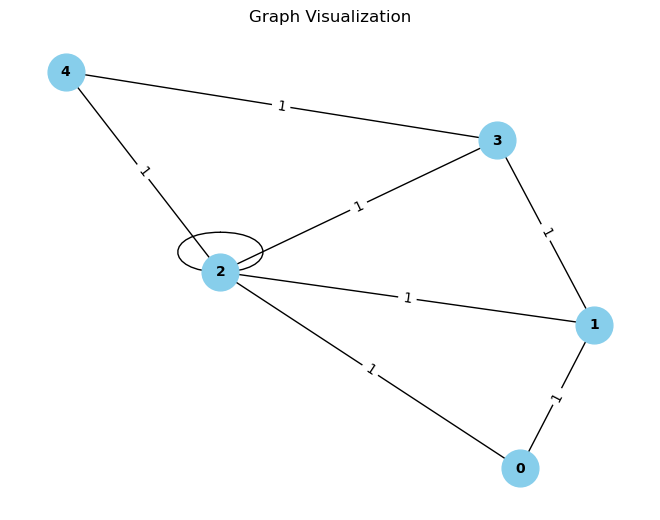

In [7]:
# Create a NetworkX graph and add edges based on the adjacency matrix
G = nx.Graph()
G.add_edges_from([(i, j, {'weight': matrix[i][j]}) for i in range(len(matrix)) for j in range(len(matrix[i])) if matrix[i][j] != 0])

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Graph Visualization")
plt.show()